<a href="https://colab.research.google.com/github/laurasels/workshop_satellietbeelden/blob/master/Workshop_Satellietdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Workshop Satellietdata**

Inleiding 

In [0]:
!apt-get update
!apt-get install libgdal-dev -y
!apt-get install python-gdal -y
!apt-get install python-numpy python-scipy -y

In [67]:
from google.colab import files
files.upload()

Saving Maastricht2.tif to Maastricht2.tif


In [0]:
import os, gdal

in_path = "Maastricht2.tif"

out_path = "satelliet/tile_"

tile_size_x = 1000
tile_size_y = 1000

ds = gdal.Open(in_path)
band = ds.GetRasterBand(1)
xsize = band.XSize
ysize = band.YSize

for i in range(0, xsize, tile_size_x):
    for j in range(0, ysize, tile_size_y):
        com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(in_path) + " " + str(out_path) + str(i) + "_" + str(j) + ".tif"
        os.system(com_string)

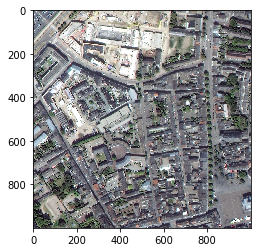

In [70]:
import matplotlib.pyplot as plt
from matplotlib import image
img = image.imread("tile_0_0.tif")
plt.imshow(img)

**NWB data inladen**

In [83]:
!unzip ../wetransfer-4075fc.zip

Archive:  ../wetransfer-4075fc.zip
Written using ZipTricks 4.8.0
 extracting: Maastricht NWB.dbf      
 extracting: Maastricht NWB.prj      
 extracting: Maastricht NWB.shp      
 extracting: Maastricht NWB.shx      
 extracting: Maastricht NWB.qpj      


In [0]:
# A script to rasterise a shapefile to the same projection & pixel resolution as a reference image.
from osgeo import ogr, gdal
import os
import subprocess

#shp_naar_tif.py maar dan als een functie op te roepen door rasterize(-,-,-)
def rasterize(InputVector, RefImage, OutputImage):   
    gdalformat = 'GTiff'
    datatype = gdal.GDT_Byte
    burnVal = 1 #value for the output image pixels
	##########################################################
	# Get projection info from reference image
    Image = gdal.Open(RefImage, gdal.GA_ReadOnly)
	# Open Shapefile
    Shapefile = ogr.Open(InputVector)
    Shapefile_layer = Shapefile.GetLayer()
	# Rasterise
    print("Rasterising shapefile...")
    Output = gdal.GetDriverByName(gdalformat).Create(OutputImage, Image.RasterXSize, Image.RasterYSize, 1, datatype, options=['COMPRESS=DEFLATE'])
    Output.SetProjection(Image.GetProjectionRef())
    Output.SetGeoTransform(Image.GetGeoTransform()) 
	# Write data to band 1
    Band = Output.GetRasterBand(1)
    Band.SetNoDataValue(255)
    gdal.RasterizeLayer(Output, [1], Shapefile_layer, burn_values=[burnVal])
	# Close datasets
    Band = None
    Output = None
    Image = None
    Shapefile = None
    # Build image overviews
    subprocess.call("gdaladdo --config COMPRESS_OVERVIEW DEFLATE "+OutputImage+" 2 4 8 16 32 64", shell=True)
    print("Done.")

In [104]:
rasterize("MaastrichtNWB.shp", "satelliet/tile_0_4000.tif", "MaasNWB.tif")

Rasterising shapefile...
Done.


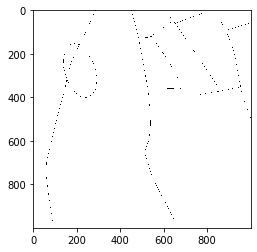

In [106]:
import matplotlib.pyplot as plt
from matplotlib import image
img = image.imread("MaasNWB.tif")
plt.imshow(img, cmap='gray')

**Rotondes voorspellen op de satellietbeelden**

In [0]:
from keras.models import load_model

In [0]:
model = load_model('finalmodel.h5', compile=False)
model.summary()

In [0]:
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input

In [0]:
x = load_img("satteliet/tile_1000_0.tif", target_size=(1000,1000))
x = img_to_array(x)
x = np.expand_dim(x, axis=0)
x = preprocess_input(x)

In [0]:
model.predict(x)[0][0]

In [0]:
!python 'py-wetransfer/wetransfer.py' https://wetransfer.com/downloads/12511fac2d3c54f4963065308d87f26120191205140146/858487a64626841d5d56f32fbcdec0a320191205140146/0a7565?utm_campaign=WT_email_tracking&utm_content=general&utm_medium=download_button&utm_source=notify_recipient_email

In [0]:
!git clone https://github.com/superalex/py-wetransfer.git